# Week 3 Lecture 1b: Sorting and Searching

In [1]:
%run "boaz_utils.ipynb"

## Sorting

Faster to search on _sorted lists_ so let's write `sort_list(L,s)` function that returns list containing elements of `L` in _sorted order_.

__Q:__ If I told you the the list `L` had only 2 values, how would you write the function?

In [2]:
def sort_list2(L):
    if L[0]>L[1]:
        L[0],L[1] = L[1],L[0]
    return L

sort_list2([7,3])

[3, 7]

**QUESTION:** If I told you that the list `L` had only 3 values, how would you write the function?

In [3]:
def sort_list3(L):
    # Step 1: Ensure L[0] is minimum element
    min_idx = 0
    if L[1]<L[0]: min_idx = 1
    if L[2]<L[min_idx]: min_idx = 2
    L[0],L[min_idx] = L[min_idx],L[0]
    # Step 2: Sort last two elements
    return [L[0]] + sort_list2(L[1:3]) 

In [4]:
sort_list3([9,5,8])

[5, 8, 9]

In [5]:
sort_list3(['cat','apple','dog'])

['apple', 'cat', 'dog']

In [6]:
def sort_list3(L):
    # Step 1: Ensure L[0] is minimum element
    min_idx = 0
    if L[1]<L[0]: min_idx = 1
    if L[2]<L[min_idx]: min_idx = 2
    L[0],L[min_idx] = L[min_idx],L[0]
    # Step 2: Sort last two elements
    return [L[0]] + sort_list2(L[1:3]) 

In [7]:
# Reminder: list concatenation
['apple'] + ['cat','dog']

['apple', 'cat', 'dog']

## Selection Sort

__Selection Sort:__ Input `L` of length `n`<br>
1) `minidx` $\leftarrow$  index of minimum element of `L`<br> 
2) Exchange `L[0]` and `L[minidx]` <br>
3) Recursively sort `L[1]`,...,`L[n-1]` <br>(`n` $\leq 1$: already sorted!)

In [8]:
#This function returns the index of the minimum element in list L
def find_min_index(L):
    current_index = 0
    for j in range(1,len(L)):
        if L[j] < L[current_index]:
            current_index = j
    return current_index

In [9]:
def selection_sort(L):
    if len(L)<=1: return L
    minidx = find_min_index(L) 
    # helper function
    L[0],L[minidx] = L[minidx],L[0]
    return [L[0]] + selection_sort(L[1:])

In [10]:
selection_sort([123,43232,543,43,234,21,325,66,567,234])

[21, 43, 66, 123, 234, 234, 325, 543, 567, 43232]

## Missing piece: `find_min_index`

__Question:__ Give algorithm to find position minimum element of a list

__Solution:__ Scan list `L` remembering the value of the current minimum so far. Update it if you see a smaller value

In [11]:
#This function returns the index of the minimum element in list L
def find_min_index(L):
    current_index = 0
    for j in range(1,len(L)):
        if L[j] < L[current_index]:
            current_index = j
    return current_index

## Without recursion

__Selection Sort (non recursive):__ Input `L` of length `n` <br>
For `i` from `0` to `n-2` do: <br>
1) `minidx` $\leftarrow$  index of minimum element of `L[i]`,...,`L[n-1]` <br>
Exchange `L[i]` and `L[minidx]`

In [12]:
def selection_sort_nr(L):
    if len(L)<=1: return L
    for i in range(len(L)-2):
        j = i + find_min_index(L[i:])
        L[i],L[j] = L[j],L[i]
    return L

In [13]:
 selection_sort_nr([5,1,10,3])

[1, 3, 10, 5]

In [14]:
mu_unsorted = ['David de Gea', 'Sergio Romero', 'Ander Herrera', 'Victor Lindelof', 'Daley Blind', 'Romelu Lukaku', 'Paul Pogba', 'Eric Bailly', 'Axel Tuanzebe', 'Phil Jones', 'Luke Shaw', 'Marcus Rashford', 'Anthony Martial', 'Joel Castro Pereira', 'Ashley Young', 'Marcos Rojo', 'Chris Smalling', 'Michael Carrick', 'Antonio Valencia', 'Jesse Lingard', 'Timothy Fosu-Mensah', 'Marouane Fellaini', 'Juan Mata', 'Henrikh Mkhitaryan', 'Matteo Darmian']
selection_sort_nr(mu_unsorted)

['Ander Herrera',
 'Anthony Martial',
 'Antonio Valencia',
 'Ashley Young',
 'Axel Tuanzebe',
 'Chris Smalling',
 'Daley Blind',
 'David de Gea',
 'Eric Bailly',
 'Henrikh Mkhitaryan',
 'Jesse Lingard',
 'Joel Castro Pereira',
 'Juan Mata',
 'Luke Shaw',
 'Marcos Rojo',
 'Marcus Rashford',
 'Marouane Fellaini',
 'Matteo Darmian',
 'Michael Carrick',
 'Paul Pogba',
 'Phil Jones',
 'Romelu Lukaku',
 'Sergio Romero',
 'Timothy Fosu-Mensah',
 'Victor Lindelof']

## Sorting with other keys

In [15]:
players_points_dict = { "Alexis Sanchez" : 264  ,  "Mesut Ozil" : 167  , "Petr Cech" : 134  , "Theo Walcott" : 122  , "Laurent Koscielny" : 121  , "Hector Bellerin" : 119  , "Olivier Giroud" : 116 , 
"Nacho Monreal" : 115  , "Shkodran Mustafi" : 90  , "Alex Iwobi" : 89  , "Granit Xhaka" : 85 , "Alex Oxlade-Chamberlain" : 83  , "Jack Wilshere" : 61  , "Aaron Ramsey" : 56  , "Francis Coquelin" : 52  , "Gabriel Paulista" : 45  , "Kieran Gibbs" : 45  , "Santi Cazorla" : 38  , "Danny Welbeck" : 37  , "Rob Holding" : 32  , "Mohamed Elneny" : 26  , "Lucas Perez" : 20  , "Emiliano Martinez" : 8  , "David Ospina" : 2  , "Carl Jenkinson" : 2  , "Per Mertesacker" : 1  , "Sead Kolasinac" : 0  , "Alexandre Lacazette" : 0  , "Eden Hazard" : 224  , "Diego Costa" : 196  , "Gary Cahill" : 178  , "Marcos Alonso Mendoza" : 177  , "Cesar Azpilicueta" : 170  , "Pedro" : 162  , "Thibaut Courtois" : 141  , "David Luiz" : 132  , "Cesc Fabregas" : 121  , "Willian" : 114  , "Victor Moses" : 105  , "Nemanja Matic" : 105  , "NGolo Kante" : 83  , "Willy Caballero" : 64  , "Michy Batshuayi" : 48  , "Kurt Zouma" : 15  , "Kenedy" : 3  , "Eduardo Carvalho" : 0  , "Antonio Rudiger" : 0  , "Tiemoue Bakayoko" : 0  , "Roberto Firmino" : 180  , "Philippe Coutinho" : 171  , "Sadio Mane" : 156  , "Georginio Wijnaldum" : 149  , "James Milner" : 139  , "Adam Lallana" : 139  , "Nathaniel Clyne" : 129  , "Simon Mignolet" : 110  , "Dejan Lovren" : 106  , "Emre Can" : 104  , "Joel Matip" : 97  , "Divock Origi" : 96  , "Jordan Henderson" : 73  , "Daniel Sturridge" : 54  , "Lucas Leiva" : 47  , "Ragnar Klavan" : 43  , "Mamadou Sakho" : 35  , "Loris Karius" : 32 , "Trent Alexander-Arnold" : 15  , "Alberto Moreno" : 8  , "Ben Woodburn" : 5  , "Marko Grujic" : 4  , "Joe Gomez" : 0  , "Sheyi Ojo" : 0  , "Mohamed Salah" : 0  , "Danny Ings" : 0  , "Dominic Solanke" : 0  , "Romelu Lukaku" : 221  , "David de Gea" : 136  , "Antonio Valencia" : 120  , "Paul Pogba" : 115  , "Eric Bailly" : 105  , "Juan Mata" : 102  , "Daley Blind" : 98  , "Ander Herrera" : 97  , "Anthony Martial" : 95  , "Marcos Rojo" : 77  , "Marcus Rashford" : 76  , "Henrikh Mkhitaryan" : 73  , "Matteo Darmian" : 70  , "Jesse Lingard" : 60  , "Phil Jones" : 55  , "Chris Smalling" : 52  , "Marouane Fellaini" : 48  , "Luke Shaw" : 45  , "Michael Carrick" : 42  , "Ashley Young" : 26  , "Sergio Romero" : 23  , "Axel Tuanzebe" : 14 ,  "Timothy Fosu-Mensah" : 9  , "Joel Castro Pereira" : 6  , "Victor Lindelof" : 0 }

In [16]:
players_points = [[p,players_points_dict[p]] for p in players_points_dict ]
players_points_old = list(players_points)

In [17]:
# players_points: list prepared in advance of players & points scored
print(len(players_points))
players_points[:20]

100


[['Alexis Sanchez', 264],
 ['Mesut Ozil', 167],
 ['Petr Cech', 134],
 ['Theo Walcott', 122],
 ['Laurent Koscielny', 121],
 ['Hector Bellerin', 119],
 ['Olivier Giroud', 116],
 ['Nacho Monreal', 115],
 ['Shkodran Mustafi', 90],
 ['Alex Iwobi', 89],
 ['Granit Xhaka', 85],
 ['Alex Oxlade-Chamberlain', 83],
 ['Jack Wilshere', 61],
 ['Aaron Ramsey', 56],
 ['Francis Coquelin', 52],
 ['Gabriel Paulista', 45],
 ['Kieran Gibbs', 45],
 ['Santi Cazorla', 38],
 ['Danny Welbeck', 37],
 ['Rob Holding', 32]]

In [18]:
#Returns "minimum" based on comparing [player1,pts1]  and [player2,pts2] by points
def find_min_index_second_comp(L):
    current_index = 0
    for j in range(1,len(L)):
        if L[j][1] < L[current_index][1]:
            current_index = j
    return current_index

In [19]:
def selection_sort_nr_second_comp(L):
    if len(L)<=1: return L
    for i in range(len(L)-2):
        j = i + find_min_index_second_comp(L[i:])
        L[i],L[j] = L[j],L[i]
    return L

In [20]:
selection_sort_nr_second_comp(players_points)

[['Sead Kolasinac', 0],
 ['Alexandre Lacazette', 0],
 ['Eduardo Carvalho', 0],
 ['Antonio Rudiger', 0],
 ['Tiemoue Bakayoko', 0],
 ['Joe Gomez', 0],
 ['Sheyi Ojo', 0],
 ['Mohamed Salah', 0],
 ['Danny Ings', 0],
 ['Dominic Solanke', 0],
 ['Victor Lindelof', 0],
 ['Per Mertesacker', 1],
 ['David Ospina', 2],
 ['Carl Jenkinson', 2],
 ['Kenedy', 3],
 ['Marko Grujic', 4],
 ['Ben Woodburn', 5],
 ['Joel Castro Pereira', 6],
 ['Emiliano Martinez', 8],
 ['Alberto Moreno', 8],
 ['Timothy Fosu-Mensah', 9],
 ['Axel Tuanzebe', 14],
 ['Kurt Zouma', 15],
 ['Trent Alexander-Arnold', 15],
 ['Lucas Perez', 20],
 ['Sergio Romero', 23],
 ['Ashley Young', 26],
 ['Mohamed Elneny', 26],
 ['Loris Karius', 32],
 ['Rob Holding', 32],
 ['Mamadou Sakho', 35],
 ['Danny Welbeck', 37],
 ['Santi Cazorla', 38],
 ['Michael Carrick', 42],
 ['Ragnar Klavan', 43],
 ['Kieran Gibbs', 45],
 ['Gabriel Paulista', 45],
 ['Luke Shaw', 45],
 ['Lucas Leiva', 47],
 ['Michy Batshuayi', 48],
 ['Marouane Fellaini', 48],
 ['Francis Coq

In [21]:
players_points = players_points_old

__Exercise:__ Sort from _maximum to minimum_ number of points ( _descending order_)

## Efficiency of sorting

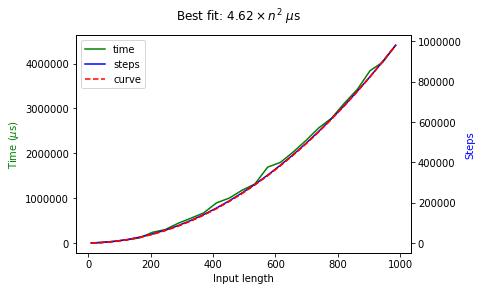

In [22]:
c , *_ = timer(selection_sort,genintlist(1000))

In [23]:
c(10**12) 

4.620303709061374e+18

In [24]:
print(f'{int(c(10**12)/ (24*3600*365)):,} years!') 

146,508,869,516 years!


## Making sorting more efficient

Where does the $n^2$ come from?

In [25]:
old_find_min_index = find_min_index

In [26]:
def find_min_index(L):
    current_index = 0
    for j in range(1,len(L)):
        print('*',end="")
        if L[j] < L[current_index]:
            current_index = j
    print("")
    return current_index

In [27]:
selection_sort([10,9,8,7,6,5,4,3,2,1])

*********
********
*******
******
*****
****
***
**
*


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [28]:
find_min_index = old_find_min_index

The number of steps we take to sort a list of length $n$ is about $n+(n-1)+(n-2)+\cdots+2+1 = \tfrac{n(n+1)}{2}=0.5n^2+0.5n$

__Can we do better?__

Turns out that the answer is __yes__ 

In [29]:
def merge(L1,L2):
    if not L1: return L2
    if not L2: return L1
    if L1[0] < L2[0]: return [L1[0]] + merge(L1[1:],L2)
    return [L2[0]] + merge(L1,L2[1:])

def mergesort(L):
    if len(L) <= 1: return L
    m = int(len(L)/2)
    L1 = mergesort(L[:m])
    L2 = mergesort(L[m:])
    return merge(L1,L2)

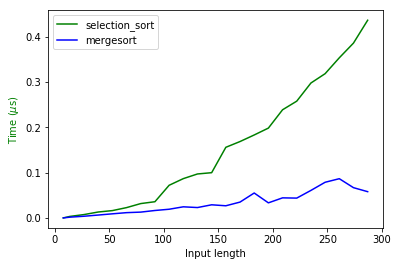

In [30]:
compare_times(selection_sort,mergesort, genintlist(300))

This will be about $n/\log n$ faster than selection sort. For $n=10^{12}$ this is

In [31]:
print(f"{int(10**12 / (math.log2(10**12))):,} times faster!")

25,085,832,971 times faster!


__The cleverness of the algorithm is more important than the speed of the machine!__